In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df_red = pd.read_csv('data/raw/winequality-red.csv', sep=',')
df_white = pd.read_csv('data/raw/winequality-white.csv', sep=";", quotechar='"')

df_red['type'] = 'red'
df_white['type'] = 'white'

df_wine_quality_combined = pd.concat([df_red, df_white], ignore_index=True)

wine_quality_combined = df_wine_quality_combined.to_parquet("data/processed/wine-quality.parquet", engine="pyarrow", index=False)

In [6]:
wine_quality = pd.read_parquet("data/processed/wine-quality.parquet")

print("--- Primeiras 5 linhas do DataFrame combinado ---")
print(wine_quality.head())

print("\n--- Informações gerais do DataFrame combinado ---")
wine_quality.info()

print("\n--- Verificando valores ausentes ---")
print(wine_quality.isnull().sum())

--- Primeiras 5 linhas do DataFrame combinado ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.


--- 2.1 Distribuição da Qualidade (Geral e por Tipo de Vinho) ---


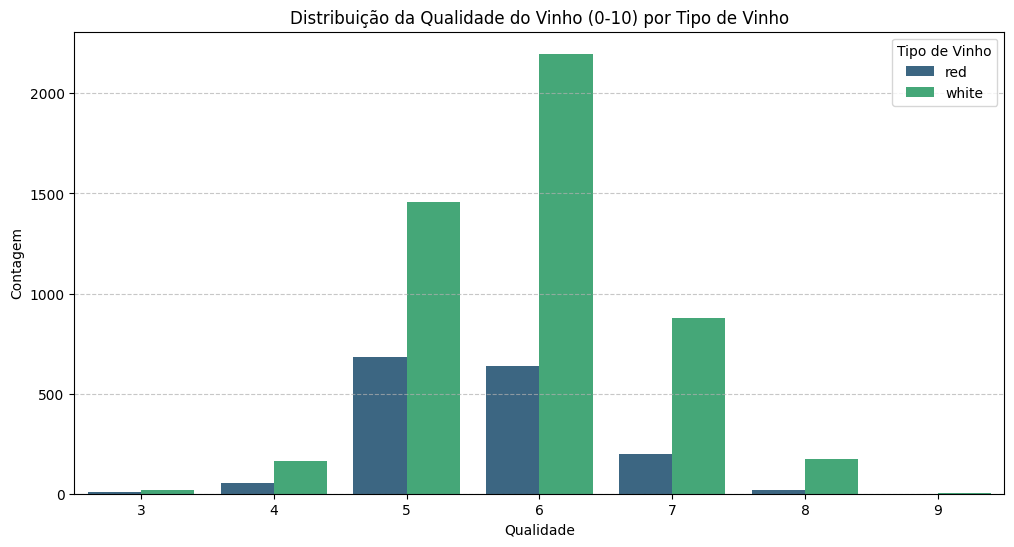


Contagem de cada nível de qualidade por tipo de vinho:
type   quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: count, dtype: int64

--- 2.2 Correlações com a Qualidade (Geral) ---


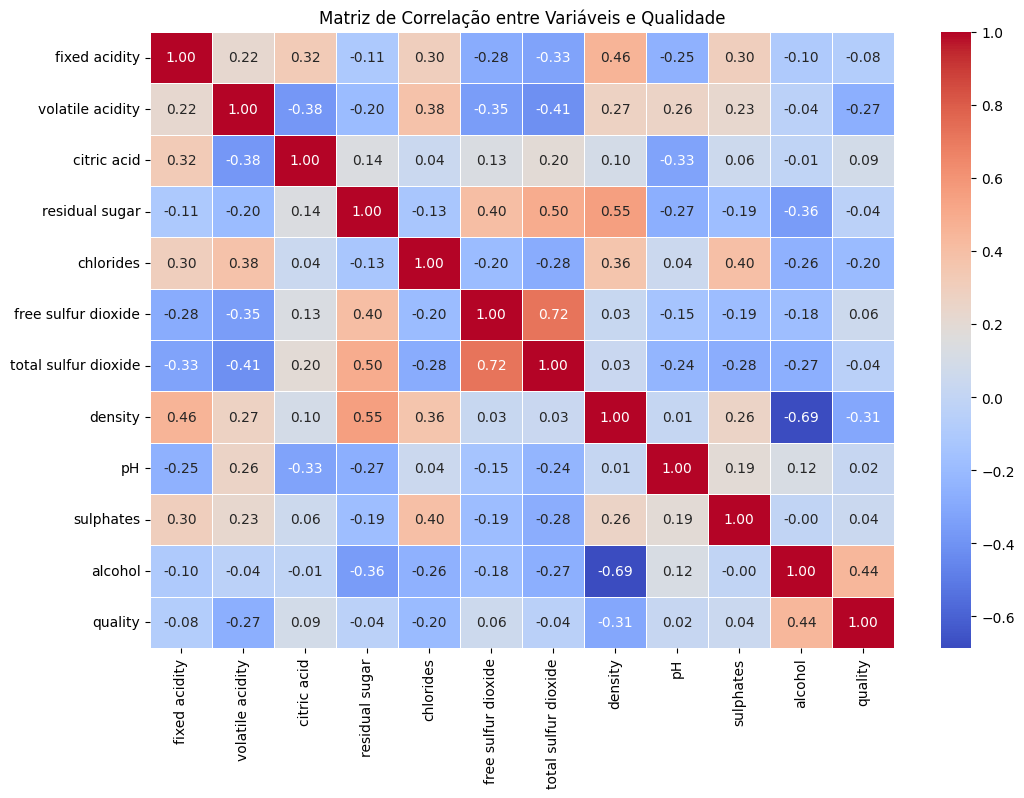


Correlações das variáveis físico-químicas com a Qualidade:
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

--- 2.3 Distribuição das Variáveis Físico-Químicas (para visualizar outliers e distribuição) ---


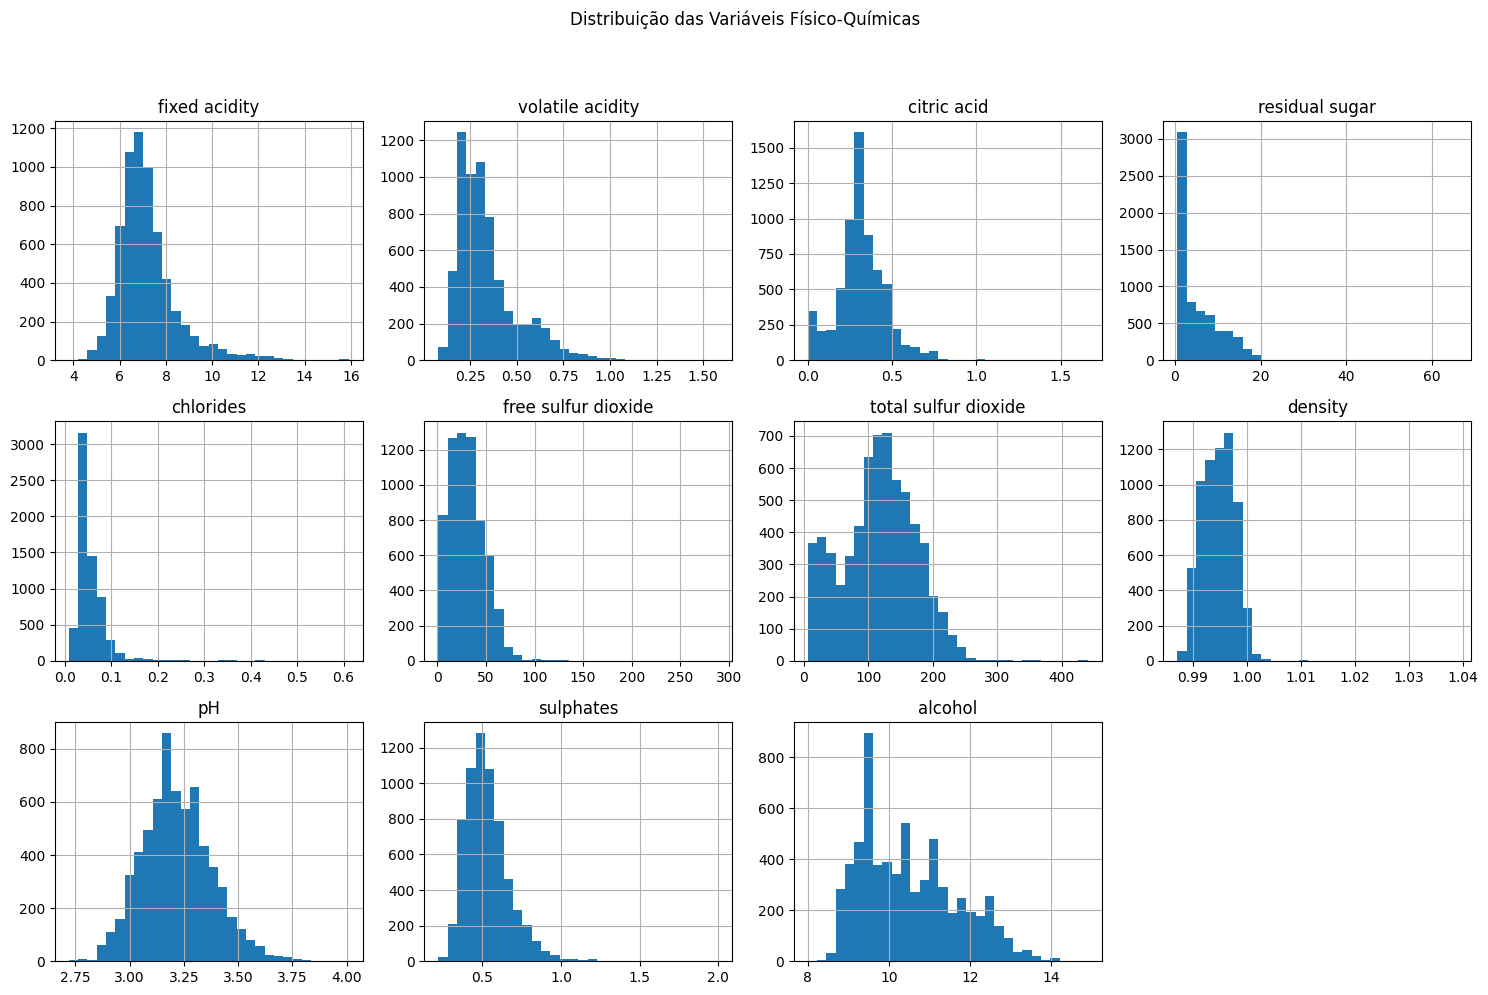

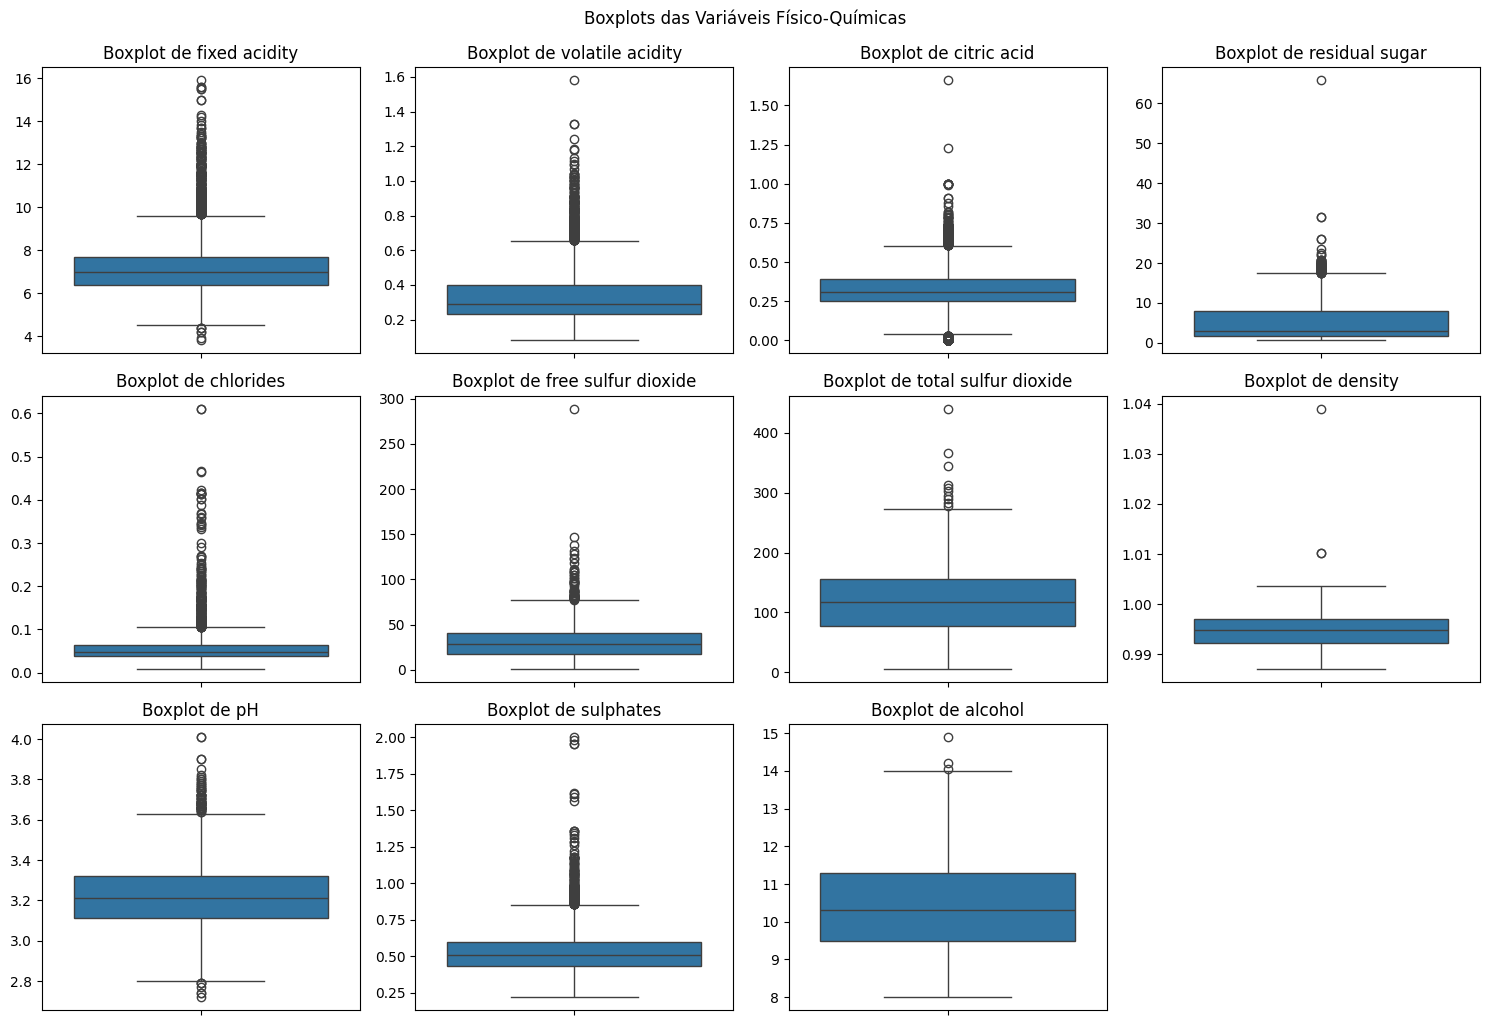

In [7]:
print("\n--- 2.1 Distribuição da Qualidade (Geral e por Tipo de Vinho) ---")
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=wine_quality, hue='type', palette='viridis')
plt.title('Distribuição da Qualidade do Vinho (0-10) por Tipo de Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Vinho')
plt.show()

print("\nContagem de cada nível de qualidade por tipo de vinho:")
print(wine_quality.groupby('type')['quality'].value_counts().sort_index())

print("\n--- 2.2 Correlações com a Qualidade (Geral) ---")
plt.figure(figsize=(12, 8))
correlation_matrix = wine_quality.drop('type', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis e Qualidade')
plt.show()

print("\nCorrelações das variáveis físico-químicas com a Qualidade:")
print(correlation_matrix['quality'].sort_values(ascending=False))

print("\n--- 2.3 Distribuição das Variáveis Físico-Químicas (para visualizar outliers e distribuição) ---")
wine_quality.drop(['quality', 'type'], axis=1).hist(bins=30, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribuição das Variáveis Físico-Químicas', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Boxplot para cada variável físico-química (para visualizar outliers)
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_quality.drop(['quality', 'type'], axis=1).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=wine_quality[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Boxplots das Variáveis Físico-Químicas', y=1.02)
plt.show()


--- 3.1 Criação da Variável Alvo Binária ('good_quality') ---
Contagem da nova variável 'good_quality':
good_quality
1    4113
0    2384
Name: count, dtype: int64


C:\Users\albet\AppData\Local\Temp\ipykernel_10712\2481841438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='good_quality', data=wine_quality, palette='pastel')


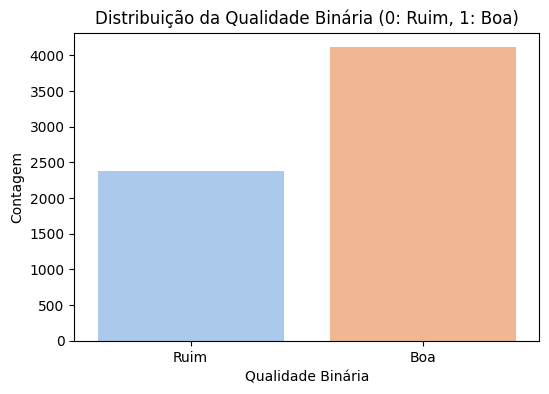


--- 3.2 Aplicar One-Hot Encoding na coluna 'type' ---
Primeiras 5 linhas do DataFrame após One-Hot Encoding de 'type':
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  3

In [27]:
print("\n--- 3.1 Criação da Variável Alvo Binária ('good_quality') ---")

wine_quality['good_quality'] = wine_quality['quality'].apply(lambda x: 1 if x > 5 else 0)

print("Contagem da nova variável 'good_quality':")
print(wine_quality['good_quality'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='good_quality', data=wine_quality, palette='pastel')
plt.title('Distribuição da Qualidade Binária (0: Ruim, 1: Boa)')
plt.xlabel('Qualidade Binária')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Ruim', 'Boa'])
plt.show()

print("\n--- 3.2 Aplicar One-Hot Encoding na coluna 'type' ---")

df_processed = wine_quality.copy()

df_processed = pd.get_dummies(df_processed, columns=['type'], drop_first=True, dtype=int)

print("Primeiras 5 linhas do DataFrame após One-Hot Encoding de 'type':")
print(df_processed.head())
print("\nColunas do DataFrame após One-Hot Encoding:")
print(df_processed.columns)

print("\n--- 3.3 Definir Features (X) e Alvo (y) ---")

features = df_processed.drop(['quality', 'good_quality'], axis=1).columns
X = df_processed[features]
y = df_processed['good_quality']

print(f"\nShape das Features (X): {X.shape}")
print(f"Shape do Alvo (y): {y.shape}")
print("\nPrimeiras 5 linhas das Features (X):")
print(X.head())

print("\n--- 3.4 Escalonamento das Features (X) ---")

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nPrimeiras 5 linhas das Features Escalonadas (X_scaled_df):")
print(X_scaled_df.head())

print("\nVerificando média e desvio padrão das features escaladas (devem ser próximos de 0 e 1, respectivamente):")
print(X_scaled_df.describe().loc[['mean', 'std']])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nProporção das classes em y_train:")
print(y_train.value_counts(normalize=True))

print("\nProporção das classes em y_test:")
print(y_test.value_counts(normalize=True))

Shape de X_train: (5197, 12)
Shape de X_test: (1300, 12)
Shape de y_train: (5197,)
Shape de y_test: (1300,)

Proporção das classes em y_train:
good_quality
1    0.633058
0    0.366942
Name: proportion, dtype: float64

Proporção das classes em y_test:
good_quality
1    0.633077
0    0.366923
Name: proportion, dtype: float64


In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nShape de X_train após SMOTE: ", X_train_resampled.shape)
print("Shape de y_train após SMOTE: ", y_train_resampled.shape)

print("\nContagem de classes em y_train_resampled (após SMOTE):")
print(y_train_resampled.value_counts())


Shape de X_train após SMOTE:  (6580, 12)
Shape de y_train após SMOTE:  (6580,)

Contagem de classes em y_train_resampled (após SMOTE):
good_quality
1    3290
0    3290
Name: count, dtype: int64


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train_resampled, y_train_resampled)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!



--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       477
           1       0.88      0.86      0.87       823

    accuracy                           0.84      1300
   macro avg       0.82      0.83      0.82      1300
weighted avg       0.84      0.84      0.84      1300


--- Matriz de Confusão ---
[[379  98]
 [116 707]]

--- AUC-ROC Score ---
AUC-ROC: 0.9059


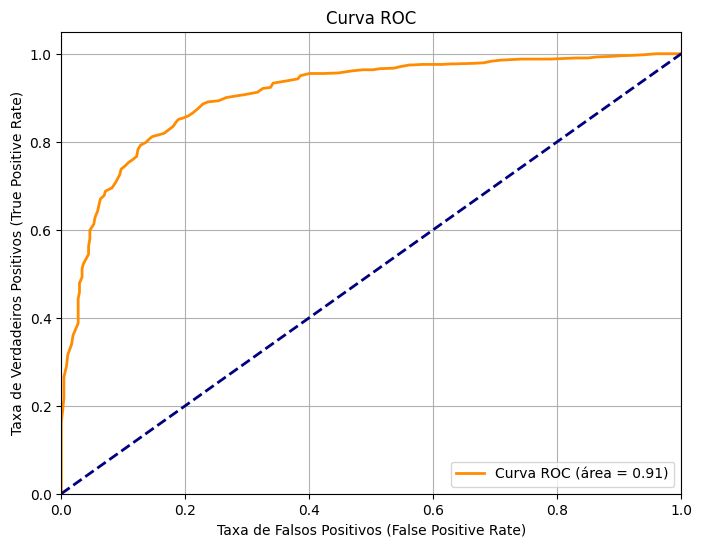

In [31]:

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\n--- Relatório de Classificação ---")

print(classification_report(y_test, y_pred))

print("\n--- Matriz de Confusão ---")

print(confusion_matrix(y_test, y_pred))

print("\n--- AUC-ROC Score ---")

auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

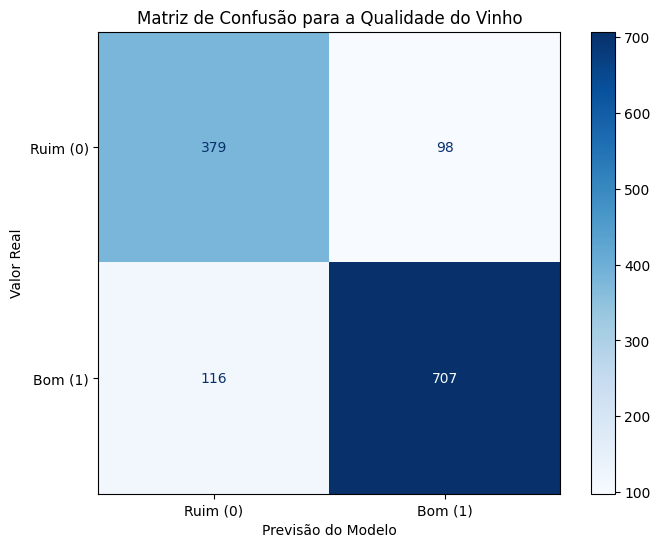

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ruim (0)", "Bom (1)"])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão para a Qualidade do Vinho')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.grid(False) 
plt.show()


In [34]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

precision_0 = report_dict['0']['precision']
recall_0 = report_dict['0']['recall']
f1_score_0 = report_dict['0']['f1-score']
support_0 = report_dict['0']['support']

precision_1 = report_dict['1']['precision']
recall_1 = report_dict['1']['recall']
f1_score_1 = report_dict['1']['f1-score']
support_1 = report_dict['1']['support']

precision_macro_avg = report_dict['macro avg']['precision']
recall_macro_avg = report_dict['macro avg']['recall']
f1_score_macro_avg = report_dict['macro avg']['f1-score']

precision_weighted_avg = report_dict['weighted avg']['precision']
recall_weighted_avg = report_dict['weighted avg']['recall']
f1_score_weighted_avg = report_dict['weighted avg']['f1-score']

accuracy = report_dict['accuracy']

data = {
    'Modelo': ['RF', 'RF', 'RF', 'RF', 'RF'],
    'Métrica': ['Precisão', 'Recall', 'F1-Score', 'Suporte', 'Acurácia'],
    'Classe 0 (Ruim)': [precision_0, recall_0, f1_score_0, support_0, '-'],
    'Classe 1 (Bom)': [precision_1, recall_1, f1_score_1, support_1, '-'],
    'Média (Macro)': [precision_macro_avg, recall_macro_avg, f1_score_macro_avg, '-', accuracy], # A acurácia é a média geral
    'Média Ponderada': [precision_weighted_avg, recall_weighted_avg, f1_score_weighted_avg, '-', '-']
}

df_results = pd.DataFrame(data)

df_results.loc[df_results['Métrica'] == 'Acurácia', 'Classe 0 (Ruim)'] = '-'
df_results.loc[df_results['Métrica'] == 'Acurácia', 'Classe 1 (Bom)'] = '-'
df_results.loc[df_results['Métrica'] == 'Acurácia', 'Média Ponderada'] = '-'

print("\n--- Tabela de Resultados do Modelo Random Forest (Conjunto de Teste) ---")

pd.set_option('display.float_format', lambda x: '%.3f' % x if isinstance(x, (float, int)) else x)
print(df_results.to_string(index=False)) 
pd.reset_option('display.float_format') 


--- Tabela de Resultados do Modelo Random Forest (Conjunto de Teste) ---
Modelo  Métrica Classe 0 (Ruim) Classe 1 (Bom) Média (Macro) Média Ponderada
    RF Precisão           0.766          0.878         0.822           0.837
    RF   Recall           0.795          0.859         0.827           0.835
    RF F1-Score           0.780          0.869         0.824           0.836
    RF  Suporte         477.000        823.000             -               -
    RF Acurácia               -              -         0.835               -


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 15],      
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None] 
}

In [37]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                 
    scoring='roc_auc',    
    n_jobs=-1,            
    verbose=2            
)

In [38]:
print("Iniciando Grid Search para otimização de hiperparâmetros do Random Forest...")
grid_search.fit(X_train_resampled, y_train_resampled) # X_train_resampled e y_train_resampled vêm do SMOTE

print("\nGrid Search concluído!")

Iniciando Grid Search para otimização de hiperparâmetros do Random Forest...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Grid Search concluído!


In [39]:
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print(f"Melhor pontuação AUC-ROC na validação cruzada: {grid_search.best_score_:.4f}")



Melhores hiperparâmetros encontrados:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor pontuação AUC-ROC na validação cruzada: 0.9312


In [41]:
# --- 6. Avaliar o Melhor Modelo no Conjunto de Teste Original ---
best_rf_model = grid_search.best_estimator_

print("\nAvaliação do Modelo Random Forest Otimizado no Conjunto de Teste:")
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1] # Probabilidades para AUC-ROC

print("\n--- Relatório de Classificação do Modelo RF Otimizado ---")
print(classification_report(y_test, y_pred_tuned))

print("\n--- Matriz de Confusão do Modelo RF Otimizado ---")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)


Avaliação do Modelo Random Forest Otimizado no Conjunto de Teste:

--- Relatório de Classificação do Modelo RF Otimizado ---
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       477
           1       0.88      0.86      0.87       823

    accuracy                           0.84      1300
   macro avg       0.83      0.83      0.83      1300
weighted avg       0.84      0.84      0.84      1300


--- Matriz de Confusão do Modelo RF Otimizado ---
[[383  94]
 [112 711]]


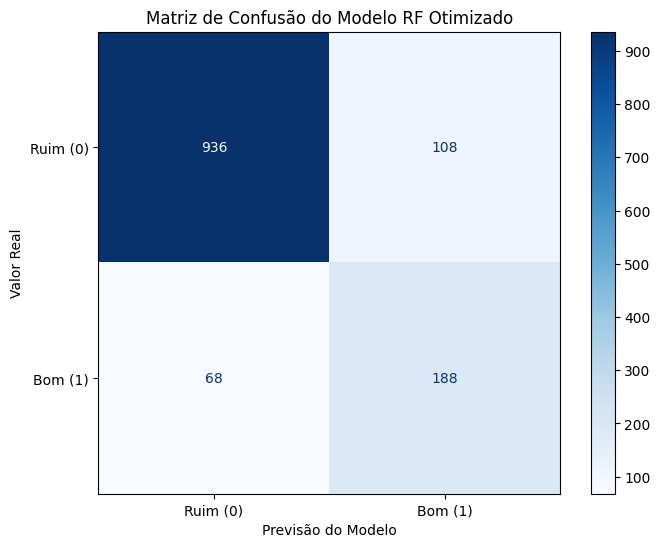


--- AUC-ROC Score do Modelo RF Otimizado ---
AUC-ROC (Otimizado): 0.9131


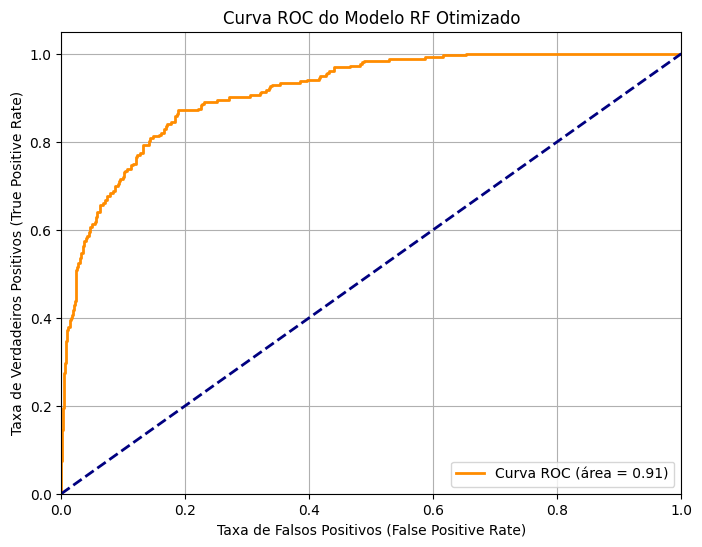

In [20]:
# Plotar Matriz de Confusão Otimizada
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=["Ruim (0)", "Bom (1)"])
fig_tuned, ax_tuned = plt.subplots(figsize=(8, 6))
disp_tuned.plot(cmap=plt.cm.Blues, ax=ax_tuned)
plt.title('Matriz de Confusão do Modelo RF Otimizado')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.grid(False)
plt.show()

print("\n--- AUC-ROC Score do Modelo RF Otimizado ---")
auc_roc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"AUC-ROC (Otimizado): {auc_roc_tuned:.4f}")

# Plotar Curva ROC Otimizada
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'Curva ROC (área = {auc_roc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC do Modelo RF Otimizado')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
